<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Lesson_2_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# insallation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) ## again to prevent too many warning

In [3]:
tf.__version__

'2.3.0'

In [4]:
# load data
from sklearn.datasets import load_breast_cancer

In [5]:
df = load_breast_cancer()

In [6]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
df.data.shape

(569, 30)

In [8]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.data)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df.target, test_size=0.33, random_state=42)

In [12]:
len(X_test), len(X_train)

(188, 381)

In [13]:
D, N = X_train.shape

In [14]:
D , N

(381, 30)

In [15]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [16]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=( D,N)),
        #tf.keras.layers.Dense(100, activation = 'sigmoid'),
        tf.keras.layers.Dense(1, activation = 'sigmoid'),                              
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 381, 1)            31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam', loss='binary_crossentropy', 
              metrics = 'accuracy')

In [18]:
EPOCHS = 100
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), 
          epochs=EPOCHS)

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 1.0668 - accuracy: 0.3097 - val_loss: 0.9861 - val_accuracy: 0.3032
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9738 - accuracy: 0.3753 - val_loss: 0.9021 - val_accuracy: 0.3670
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8897 - accuracy: 0.4462 - val_loss: 0.8270 - val_accuracy: 0.4787
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.5197 - val_loss: 0.7614 - val_accuracy: 0.5532
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7491 - accuracy: 0.5774 - val_loss: 0.7031 - val_accuracy: 0.6330
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.6483 - val_loss: 0.6543 - val_accuracy: 0.6543
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.7113 - val_loss: 0.6118 - val_accuracy: 0.6862
Epoch 8/100


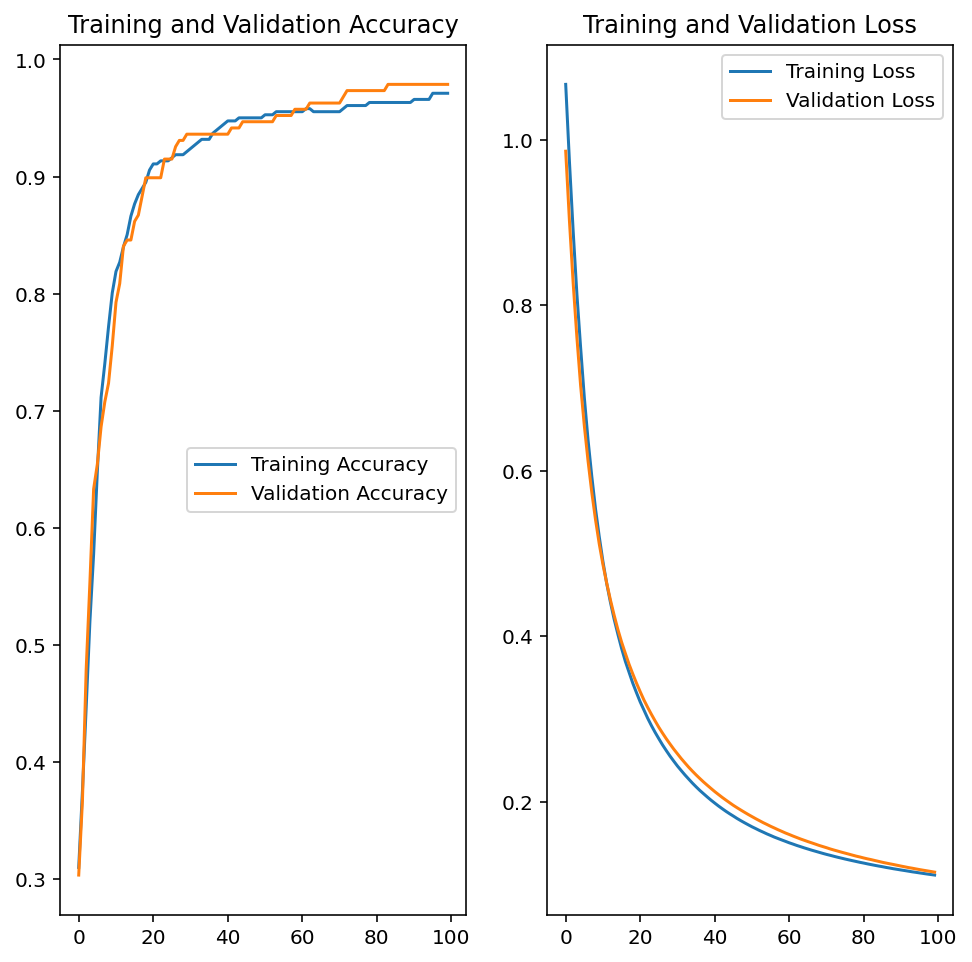

In [19]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
import pandas as pd

In [21]:
pred = model.predict(X_train)

In [22]:
pred.shape, y_train.shape

((381, 1), (381,))

In [28]:
pd.DataFrame({'model':np.round(pred).reshape(381,), 'actual':y_train})

,model,actual
0,0.0,0
1,1.0,1
2,0.0,0
3,1.0,1
4,1.0,1
...,...,...
376,1.0,1
377,1.0,1
378,1.0,1
379,0.0,0


In [37]:
# evaluate accuracy
pred_test = np.round(model.predict(X_test))
print('Manually calculated accuracy:', np.mean(pred_test.flatten() == y_test))
print('Evaluate output:',model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9787
Evaluate output: [0.11529529094696045, 0.978723406791687]


### End of Document
